# Домашнее задание
## по дисциплине «Методы машинного обучения»
Домашнее задание по дисциплине направлено на решение комплексной задачи машинного обучения. Домашнее задание включает выполнение следующих шагов:
1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков Масштабирование данных. 4. Формирование вспомогательных признаков, улучшающих качество моделей.
4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать выбор.
6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее трех моделей, хотя бы одна из которых должна быть ансамблевой.
7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
9. Подбор гиперпараметров для выбранных моделей. Рекомендуется подбирать не более 1-2 гиперпараметров. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
11. Формирование выводов о качестве построенных моделей на основе выбранных метрик.



In [58]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks", rc={'figure.figsize': (10,10)})
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## Выбор данных

In [61]:
data = pd.read_csv('C:/Users/VTsapiy/Desktop/data/winequalityN.csv')
#data_1 = pd.read_csv('C:/Users/VTsapiy/Desktop/data/heart.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Проведение разведочного анализа данных

In [62]:
data.shape

(6497, 13)

In [63]:
data.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [64]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [65]:
data_new = data.dropna(axis=0, how='any')
(data.shape, data_new.shape)

((6497, 13), (6463, 13))

Пропусков данных теперь нет

## Построение графиков, необходимых для понимания структуры данных

In [66]:
data_new.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [67]:
# Уникальные значения для колонки age
data_new['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [68]:
data['alcohol'].unique()

array([ 8.8       ,  9.5       , 10.1       ,  9.9       ,  9.6       ,
       11.        , 12.        ,  9.7       , 10.8       , 12.4       ,
       11.4       , 12.8       , 11.3       , 10.5       ,  9.3       ,
       10.        , 10.4       , 11.6       , 12.3       , 10.2       ,
        9.        , 11.2       ,  8.6       ,  9.4       ,  9.8       ,
       11.7       , 10.9       ,  9.1       ,  8.9       , 10.3       ,
       12.6       , 10.7       , 12.7       , 10.6       ,  9.2       ,
        8.7       , 11.5       , 11.8       , 12.1       , 11.1       ,
        8.5       , 12.5       , 11.9       , 12.2       , 12.9       ,
       13.9       , 14.        , 13.5       , 13.3       , 13.2       ,
       13.7       , 13.4       , 13.        ,  8.        , 13.1       ,
       13.6       ,  8.4       , 14.2       , 11.94      , 12.89333333,
       11.46666667, 10.98      , 10.03333333, 11.43333333, 10.53333333,
        9.53333333, 10.93333333, 11.36666667, 11.33333333, 11.06

In [43]:
data['chol'].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131], dtype=int64)

In [69]:
data['fixed acidity'].unique()

array([ 7.  ,  6.3 ,  8.1 ,  7.2 ,  6.2 ,  8.6 ,  7.9 ,  6.6 ,  8.3 ,
         nan,  7.4 ,  6.5 ,  6.4 ,  6.8 ,  7.6 ,  6.9 ,  8.5 ,  5.8 ,
        7.3 ,  6.7 ,  6.  ,  7.1 ,  6.1 ,  7.5 ,  9.8 ,  5.5 ,  5.9 ,
        7.8 ,  5.7 ,  8.2 ,  5.6 ,  5.2 ,  8.4 , 10.2 ,  7.7 ,  5.3 ,
        5.4 ,  9.1 ,  5.  ,  8.  , 10.  ,  5.1 ,  9.2 ,  9.  ,  8.8 ,
        8.7 ,  4.8 , 10.3 ,  9.4 ,  9.6 ,  9.3 ,  8.9 ,  9.7 , 10.7 ,
       14.2 ,  9.9 ,  9.5 , 11.8 ,  4.6 ,  6.15,  4.5 ,  7.15,  6.45,
        4.2 ,  4.9 ,  4.7 ,  3.8 ,  4.4 ,  3.9 , 11.2 , 10.1 , 11.5 ,
       12.8 , 11.  , 11.6 , 12.  , 15.  , 10.8 , 11.1 , 12.5 , 10.9 ,
       11.4 , 10.4 , 13.3 , 10.6 , 13.4 , 11.9 , 12.4 , 12.2 , 13.8 ,
       13.5 , 10.5 , 12.6 , 14.  , 13.7 , 12.7 , 12.3 , 15.6 , 11.3 ,
       13.  , 12.9 , 14.3 , 15.5 , 11.7 , 13.2 , 15.9 , 12.1 ])

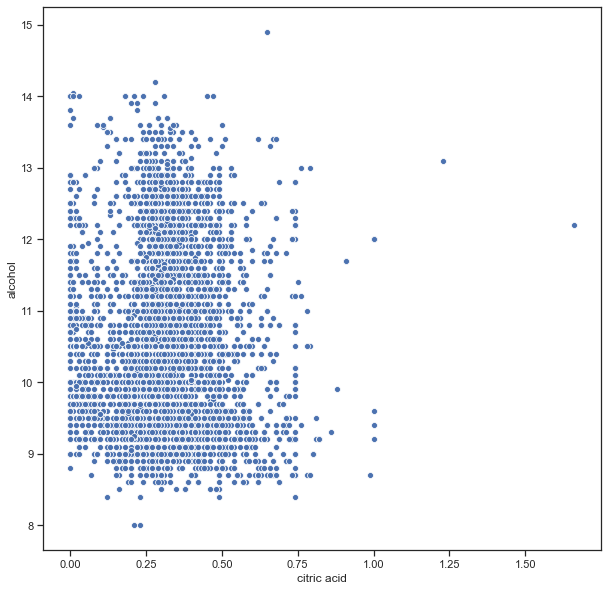

In [75]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='citric acid', y='alcohol', data=data)

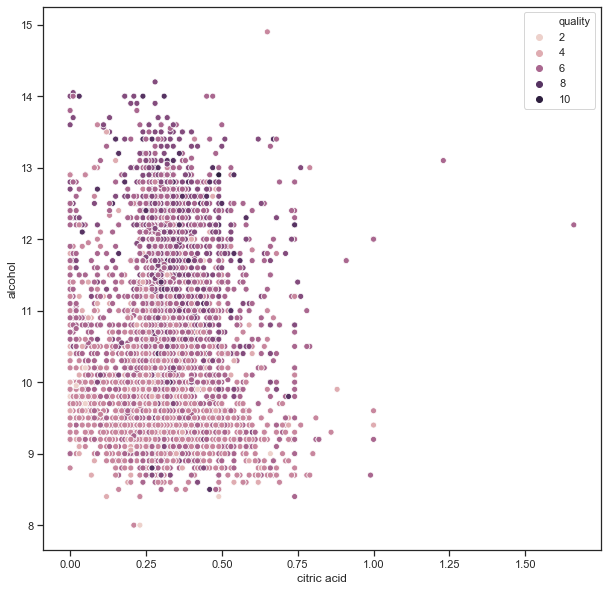

In [77]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='citric acid', y='alcohol', data=data, hue='quality')

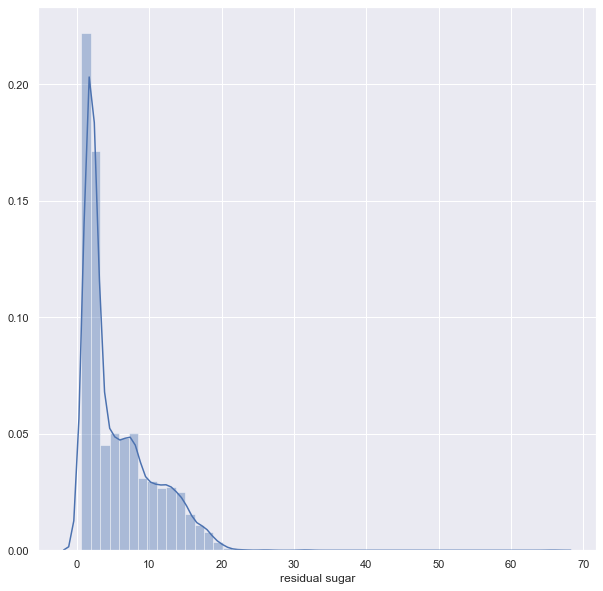

In [82]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['residual sugar'])

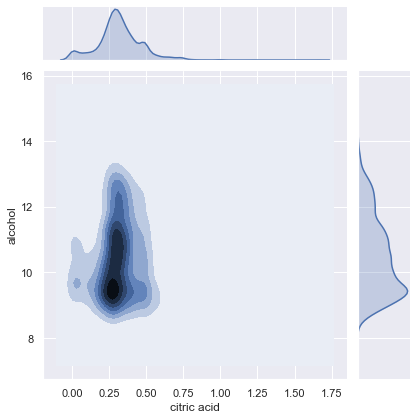

In [83]:
sns.jointplot(x='citric acid', y='alcohol', data=data_new, kind="kde")

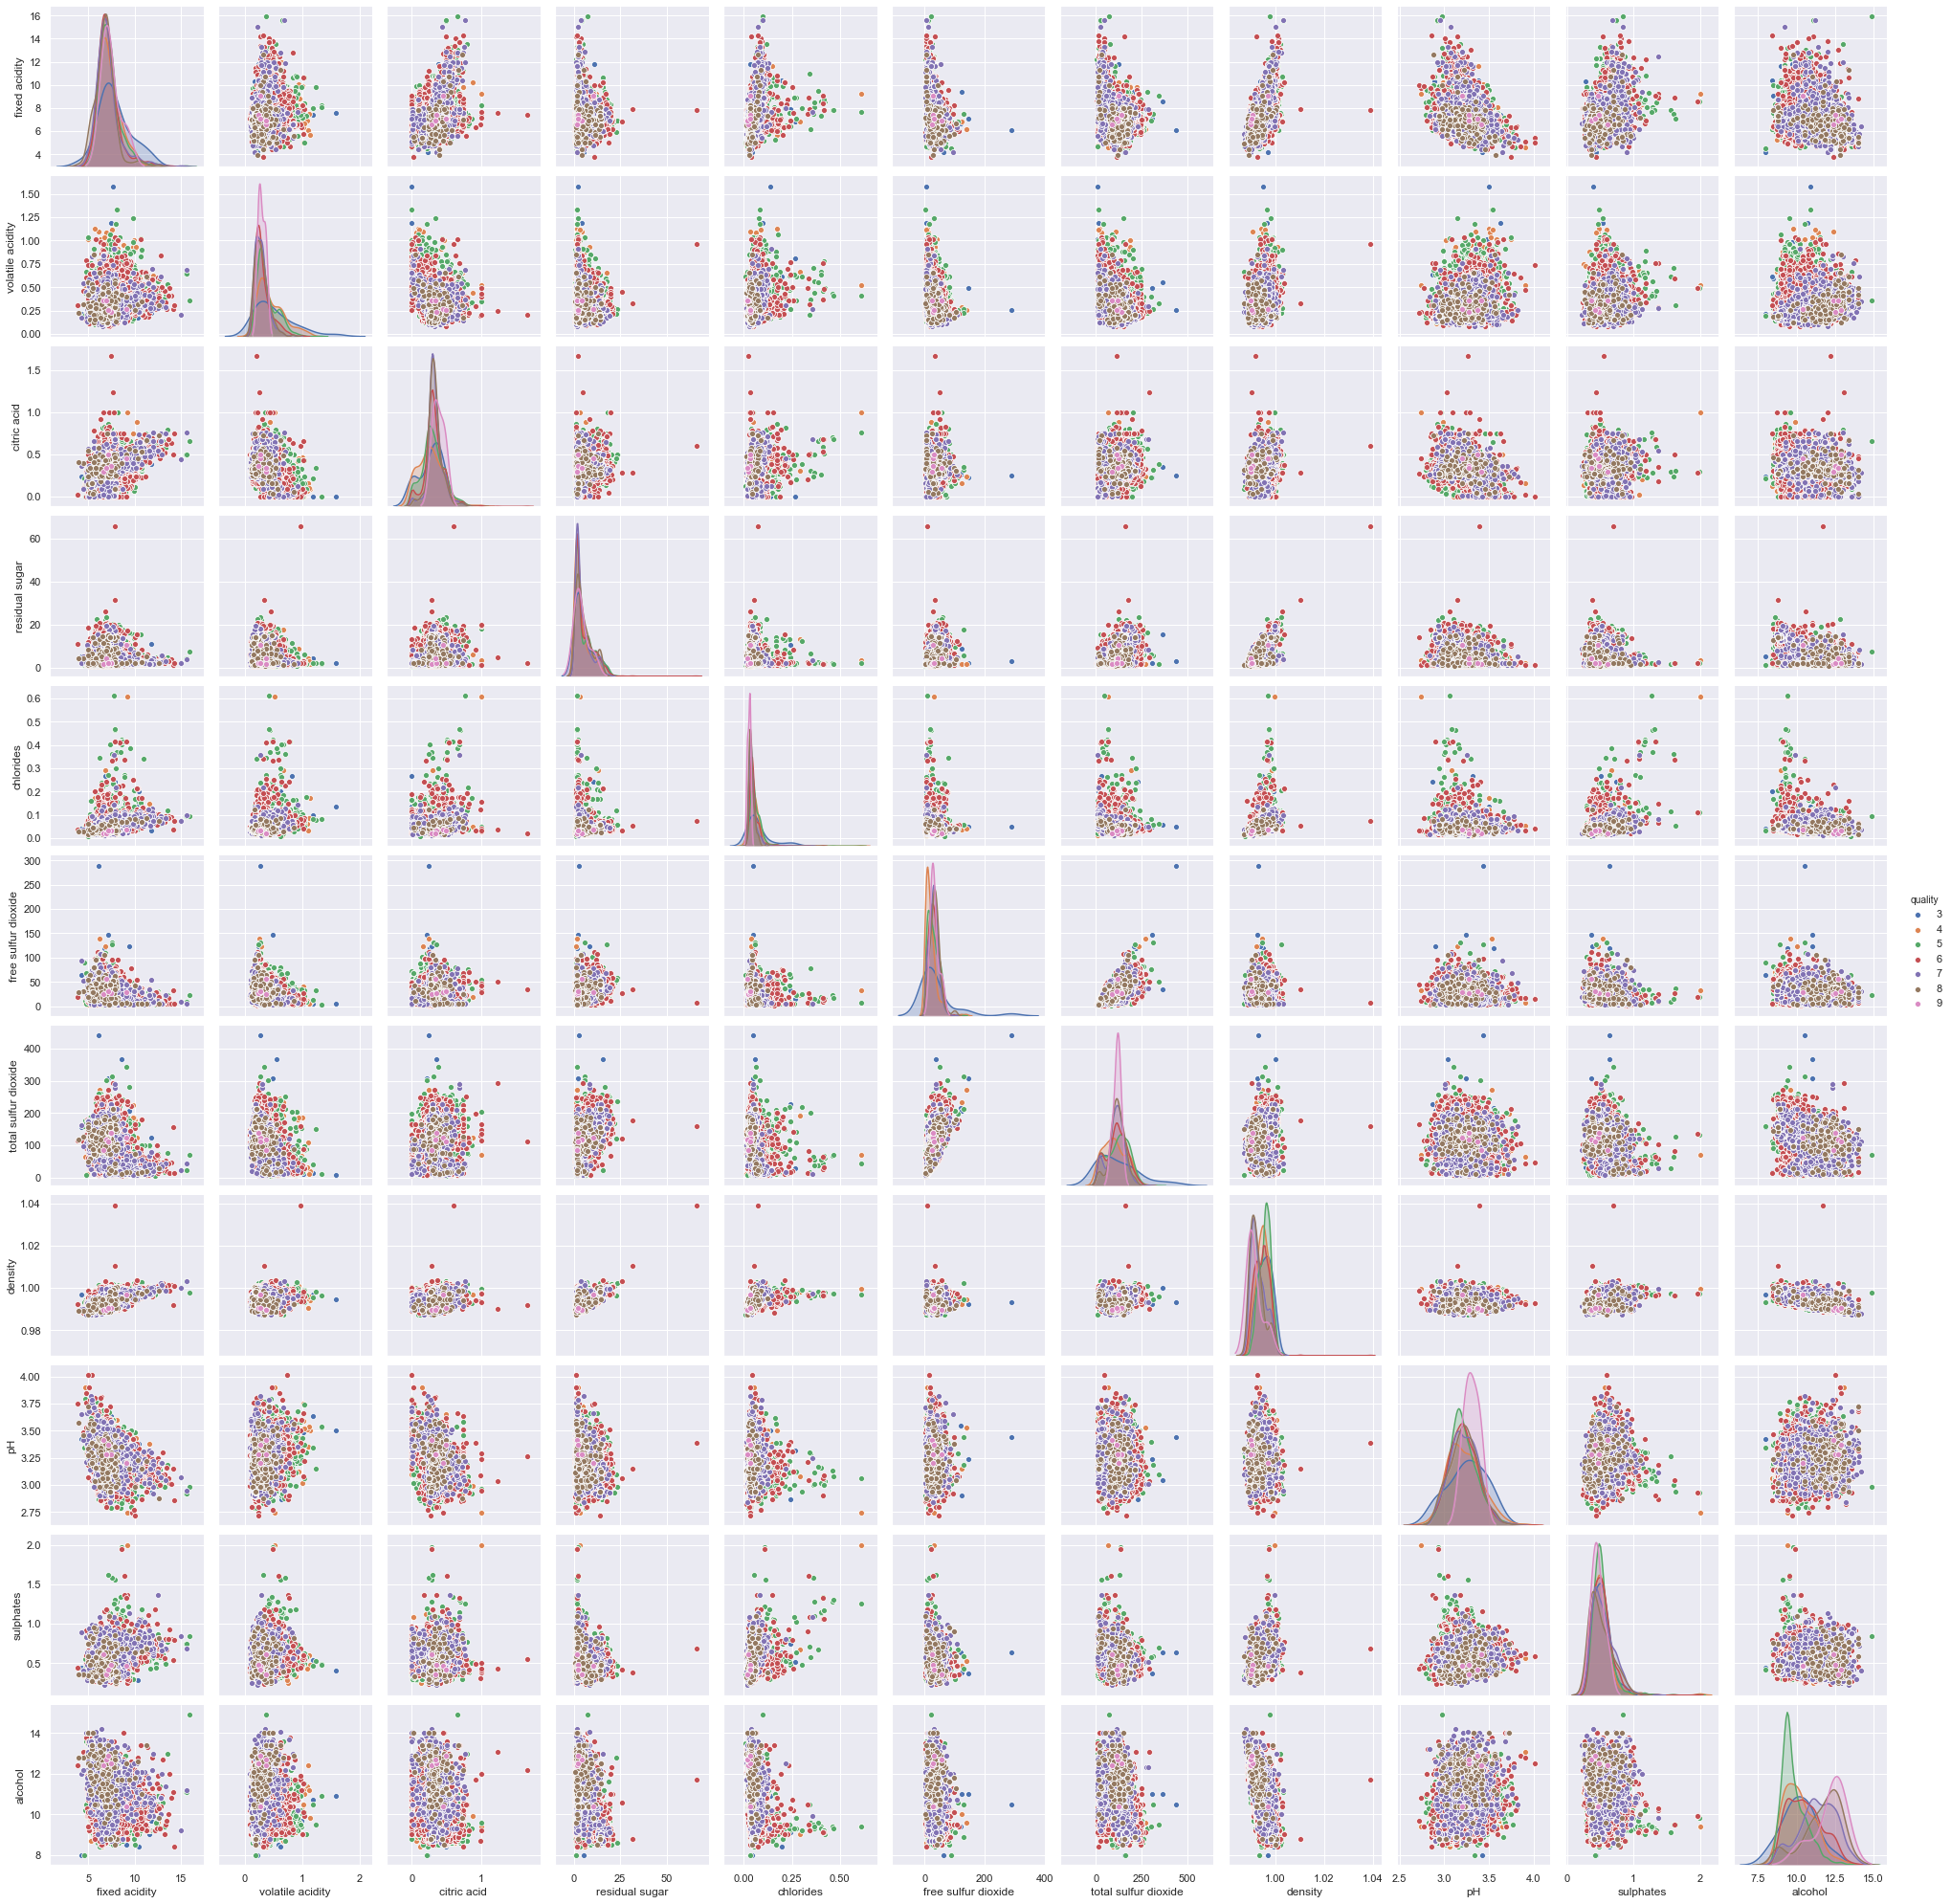

In [84]:
sns.pairplot(data, hue="quality")

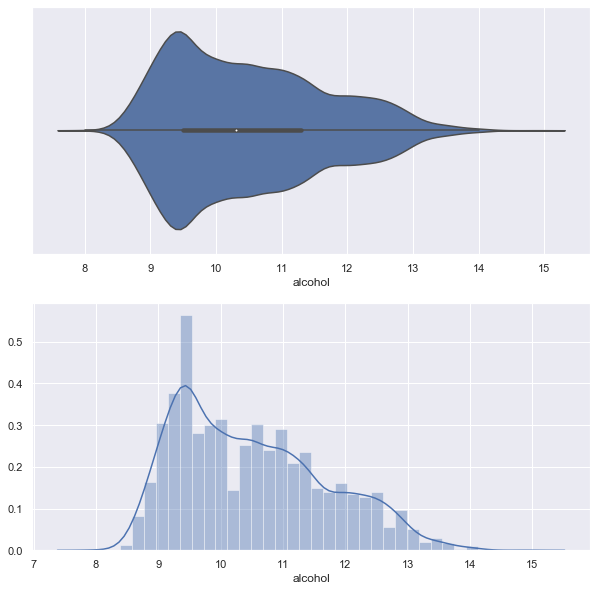

In [86]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data_new['alcohol'])
sns.distplot(data_new['alcohol'], ax=ax[1])

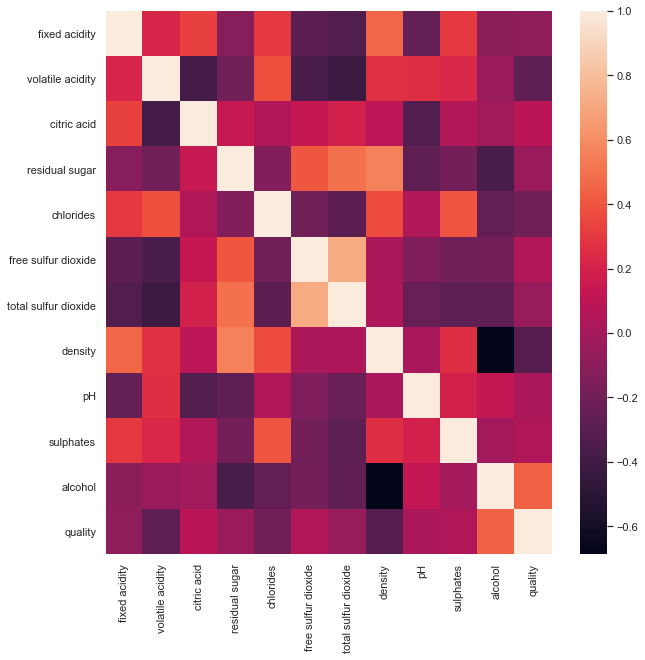

In [87]:
sns.heatmap(data.corr())

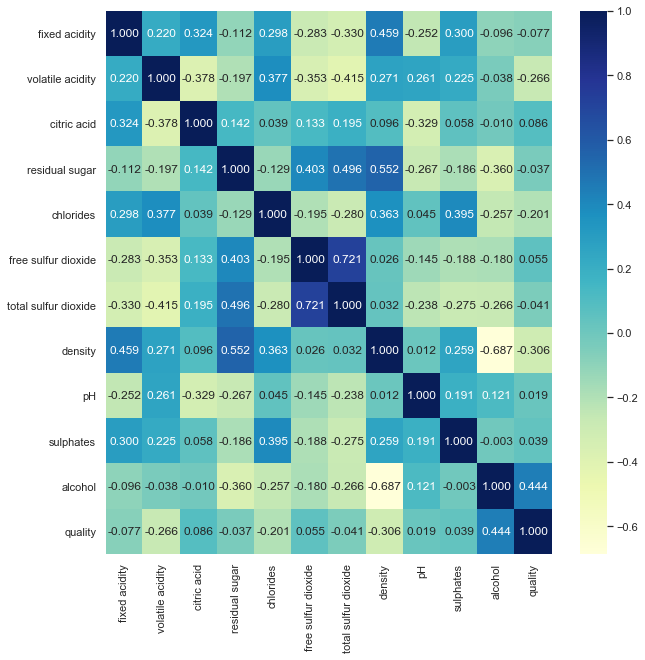

In [88]:
sns.heatmap(data.corr(), annot=True, fmt='.3f', cmap='YlGnBu')

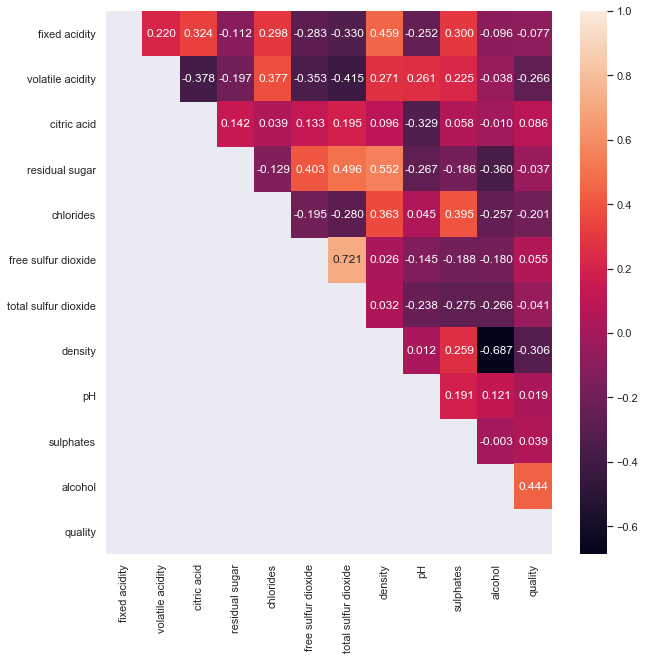

In [89]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

## Выбор признаков, подходящих для построения моделей.

На корреляционной матрице видно что качество вина больше всего коррелирует с алкоголем, затем идет citric acid(лимонная кислота), общим диоксидом серы. При отрицательной корреляции, при возрастании одного параметра, значение другого параметра уменьшается. Так например в зависимости от volatile acidity(летучей кислотности), значение качества вина уменьшается.

## Масштабирование данных

In [90]:
data_new.shape

(6463, 13)

In [92]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Удаление лишних данных

In [91]:
data_clean = data_new

In [93]:
data_clean = data_new.drop('type', axis=1)
data_clean = data_clean.drop('fixed acidity', axis=1)
data_clean = data_clean.drop('volatile acidity', axis=1)
data_clean = data_clean.drop('residual sugar', axis=1)
data_clean = data_clean.drop('chlorides', axis=1)
data_clean = data_clean.drop('free sulfur dioxide', axis=1)
data_clean = data_clean.drop('total sulfur dioxide', axis=1)
data_clean = data_clean.drop('density', axis=1)
data_clean = data_clean.drop('pH', axis=1)
data_clean = data_clean.drop('sulphates', axis=1)

In [94]:
data_clean.head()

,citric acid,alcohol,quality
0,0.36,8.8,6
1,0.34,9.5,6
2,0.40,10.1,6
3,0.32,9.9,6
4,0.32,9.9,6


In [95]:
data_clean.corr()

,citric acid,alcohol,quality
citric acid,1.000000,-0.010056,0.084926
alcohol,-0.010056,1.000000,0.444637
quality,0.084926,0.444637,1.000000


## Выбор метрик

Для оценки качества работы алгоритма на каждом из классов по отдельности введем метрики
precision (точность) и recall (полнота). Precision можно интерпретировать как долю объектов,
названных классификатором положительными и при этом действительно являющимися
положительными, а recall показывает, какую долю объектов положительного класса из всех объектов
положительного класса нашел алгоритм. Именно введение precision не позволяет нам записывать все
объекты в один класс, так как в этом случае мы получаем рост уровня False Positive. Recall
демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision —
способность отличать этот класс от других классов. Существует несколько различных способов
объединить precision и recall в агрегированный критерий качества.Будем использывать F-мера —
среднее гармоническое precision и recall. Выбранные метрики:
1. Precision
2. recall
3. F-мера

## Выбор моделей для задачи классификации

1. SGDClassifier - стохастический градиентный спуск.
2. DecisionTreeClassifier - дерево решений.
3. RandomForestClassifier - случайный лес.


In [111]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
from sklearn.model_selection import GridSearchCV

In [97]:
target = data_clean['quality']

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(
 data_clean,
 target,
 test_size=0.2,
 random_state=1
)

In [99]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((5170, 3), (5170,), (1293, 3), (1293,))

## Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров


Стохастический градиентный спуск

In [105]:
sgd = SGDClassifier().fit(X_train, Y_train)
predicted_sgd = sgd.predict(X_test)

In [106]:
def print_metrics(Y_test, predicted_value):
 print("precision_score {}".format(
 precision_score(Y_test, predicted_sgd, average='weighted')))
 print("recall_score {}".format(
 recall_score(Y_test, predicted_sgd, average='weighted')))
 print("f1_score {}".format(
 f1_score(Y_test, predicted_sgd, average='weighted')))


In [108]:
print_metrics(Y_test, predicted_sgd)

precision_score 0.7973186602072507
recall_score 0.860015467904099
f1_score 0.8266143010369312


Случайный лес

In [109]:
rfc = RandomForestClassifier().fit(X_train, Y_train)
predicted_rfc = rfc.predict(X_test)
print_metrics(Y_test, predicted_rfc)

precision_score 0.7973186602072507
recall_score 0.860015467904099
f1_score 0.8266143010369312


Дерево решений

In [110]:
dt = DecisionTreeClassifier().fit(X_train, Y_train)
predicted_dt = dt.predict(X_test)
print_metrics(Y_test, predicted_dt)


precision_score 0.7973186602072507
recall_score 0.860015467904099
f1_score 0.8266143010369312


In [113]:
rfc_n_range = np.array(range(5,100,5))
rfc_tuned_parameters = [{'n_estimators': rfc_n_range}]
rfc_tuned_parameters

[{'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
         90, 95])}]

## Подбор гиперпараметров для Случайного леса(RAndomForest)

In [115]:
warnings.filterwarnings('ignore')
gs_rfc = GridSearchCV(RandomForestClassifier(), rfc_tuned_parameters, cv=5,
 scoring='accuracy')
gs_rfc.fit(X_train, Y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [116]:
gs_rfc.best_params_

{'n_estimators': 75}

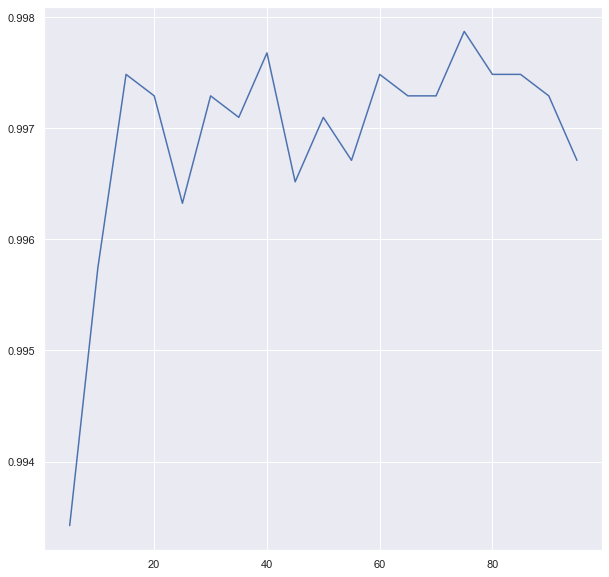

In [117]:
plt.plot(rfc_n_range, gs_rfc.cv_results_['mean_test_score'])

## Сравнение моделей после подбора гиперпараметров

In [120]:
rfc_optimized = RandomForestClassifier(n_estimators=gs_rfc.best_params_['n_estimators'
]).fit(X_train, Y_train)
predicted_rfc_opt = rfc_optimized.predict(X_test)
from sklearn.metrics import accuracy_score

In [122]:
accuracy_score(Y_test, predicted_rfc_opt)

0.9969064191802011

In [124]:
(precision_score(Y_test, predicted_rfc_opt, average='weighted'),
recall_score(Y_test, predicted_rfc_opt, average='weighted'))

(0.9961996737104459, 0.9969064191802011)

In [125]:
f1_score(Y_test, predicted_rfc_opt, average='weighted')

0.9962789164363217

## Подбор гиперпараметров для Дерево решений (DecisionTreeClassifier)

In [126]:
n_range = np.array(range(1,10,1))
tuned_parameters = [{'max_depth': n_range}]
tuned_parameters

[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}]

In [128]:
clf_gs_dt = GridSearchCV(DecisionTreeClassifier(random_state=1), tuned_parameters,
 cv=5, scoring='accuracy')
clf_gs_dt.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}],
             pre_dispatch='2*n_jobs', refit=True, 

In [129]:
clf_gs_dt.best_params_

{'max_depth': 4}

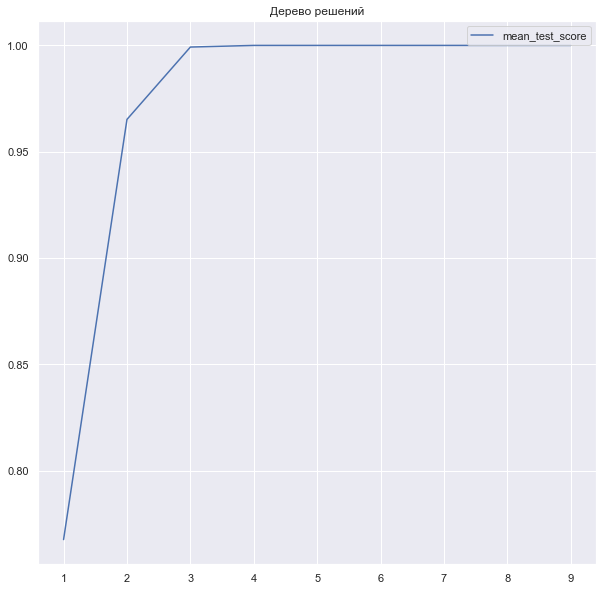

In [130]:
plt.title('Дерево решений')
plt.plot(n_range, clf_gs_dt.cv_results_['mean_test_score'],label='mean_test_score')
plt.legend()
plt.show()

## Сравнение моделей после подбора гиперпараметров для Дерева решений (DecisionTreeClassifier)


In [133]:
dt_optimized = DecisionTreeClassifier(max_depth=clf_gs_dt.best_params_['max_depth']).fit(X_train, Y_train)
predicted_dt_opt = dt_optimized.predict(X_test)

In [135]:
accuracy_score(Y_test, predicted_dt_opt)

1.0

In [136]:
(precision_score(Y_test, predicted_dt_opt, average='weighted'),
recall_score(Y_test, predicted_dt_opt, average='weighted'))

(1.0, 1.0)

In [137]:
f1_score(Y_test, predicted_dt_opt, average='weighted')

1.0

## Подбор гиперпараметров для SGDClassifier

In [138]:
n_range = np.array(range(0,100,5))
n_range = n_range / 100
tuned_parameters = [{'l1_ratio': n_range}]
tuned_parameters

[{'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
         0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])}]

In [140]:
clf_gs_sgd = GridSearchCV(SGDClassifier(), tuned_parameters, cv=5,
 scoring='accuracy')
clf_gs_sgd.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])}],
             pre_dispatch='2*n_jo

In [141]:
clf_gs_sgd.best_params_

{'l1_ratio': 0.2}

In [142]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

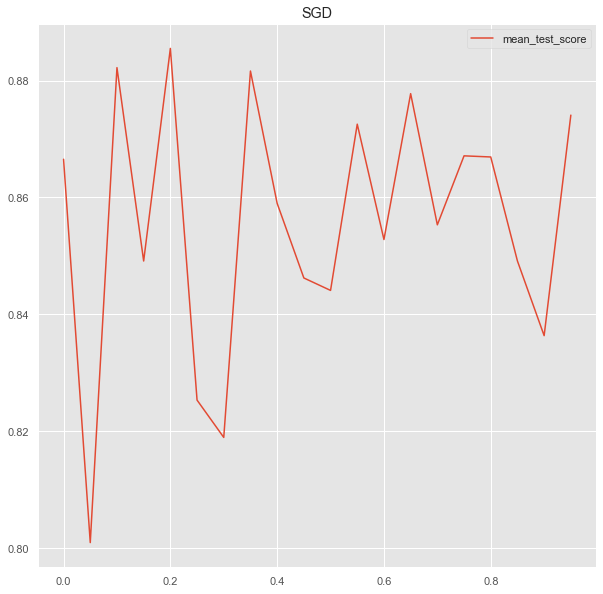

In [143]:
plt.title('SGD')
plt.plot(n_range, clf_gs_sgd.cv_results_['mean_test_score'],label='mean_test_score')
plt.legend()
plt.show()

## Сравнение моделей после подбора гиперпараметров для SGDClassifier

In [144]:
sgd_optimized = SGDClassifier(l1_ratio=clf_gs_sgd.best_params_['l1_ratio']).fit(X_train, Y_train)
predicted_sgd_opt = sgd_optimized.predict(X_test)

In [145]:
accuracy_score(Y_test, predicted_sgd_opt)

0.8553750966744006

In [146]:
(precision_score(Y_test, predicted_sgd_opt, average='weighted'),
recall_score(Y_test, predicted_sgd_opt, average='weighted'))

(0.8180031103415984, 0.8553750966744006)

In [148]:
f1_score(Y_test, predicted_sgd_opt, average='weighted')

0.824273094662115

## SVG

In [150]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(X_train,Y_train)
print("train accuracy:",svm.score(X_train,Y_train))
print("test accuracy:",svm.score(X_test,Y_test))
predicted_sgd = svm.predict(X_test)
def print_metrics(Y_test, predicted_value):
 print("precision_score {}".format(
 precision_score(Y_test, predicted_sgd, average='weighted')))
 print("recall_score {}".format(
 recall_score(Y_test, predicted_sgd, average='weighted')))
 print("f1_score {}".format(
 f1_score(Y_test, predicted_sgd, average='weighted')))
print_metrics(Y_test, predicted_sgd)

train accuracy: 0.9941972920696325
test accuracy: 0.9961330239752514
precision_score 0.9925266676752896
recall_score 0.9961330239752514
f1_score 0.9942672196488804


### Вывод:
наибольшую точность показал метод деревья решений при изначальном исследовании и после
подбора гиперпараметров. Метод случайного леса и опорных векторов имеют почти одинковые показатели, которые бликзки к методу деревья решений. Модель SGD  показал низкие результаты, по сравнению с тремя предыдущими методами, на 15-20% меншье.
1. SVG: 0.9942672196488804
2. SGD: 0.824273094662115
3. RAndom Forest: 0.9962789164363217
4. Decision Tree: 1.0

Судя по результатам, наиболее оптимальной моделью является метод дерева решений, но случайный лес и svg так же подойдут. При изменении гиперпараметром сильных изменений не обнаружено